# Page-Rank

## Auftrag
**Autor:** Gregor von Flüe  



### Umgebung
Damit die Snippets funktionieren, müssen die folgenden Python-Module installiert sein.

* NumPy [1]

In [1]:
# pip install numpy

## Theorie
In diesem Kapitel wird der theoretische Teil aufgeführt, welcher für die Anwendungspeispiele relevant ist.

### Parallelepiped
Bei dieser Arbeit wird mit einem Parallelepiped gearbeitet, welches über vier Parameter eindeutig definierbar ist. Es besteht aus einem Eckpunkt $P_{Eckpunkt}$ und drei Kantenvektoren $\vec{a}$, $\vec{b}$ und $\vec{c}$ welche aus dem Eckpunkt drei Parallelogramme aufspannen. Die drei Kantenvektoren müssen jedoch linear unabhängig zueinander sein, ansonsten entsteht ein Quader. Zu jedem Parallelogramm, wird eine deckungsgleiche und parallele Seite hinzugefügt [3].   
Um die lineare Unabhängigkeit zu prüfen wird das Gausche Eliminationsverfahren angewedet. Dazu werden die drei Kantenvektoren zu einer quadratischen $3x3$-Matrix $A$ zusammen gefasst. Wenn nun die Matrix $A$ regulär ist, sind die Kantenvektoren linear unabhängig. Ist jedoch die Matrix $A$ singulär, sind die Kantenvektoren linear abhängig und die Determinate von $A$ ist 0 [4].  
![Bild 1](img/Parallelepiped-klein.png)  
[Bild 1] Parallelepiped, [Wikipedia](https://de.wikipedia.org/wiki/Parallelepiped#/media/Datei:Parallelepiped-v.svg)

### Parallelprojektion
Bei einer Parallelprojektion werden alle Punkte eines Körpers im dreidimensionalen Raum auf eine gegebene Ebene projiziert. Dabei sind die Projektionsstrahlen zueinander parallel.  
Ein Punkt $p$ ist im dreidimensionalen Raum wie folgt definiert: $p = \begin{pmatrix}
x \\
y \\
z \\
\end{pmatrix}$ Dieser Punkt wird durch einen Richtungsvektor $\vec{r} = \begin{pmatrix}
r_x \\
r_y \\
r_z \\
\end{pmatrix}$ auf die xy-Ebene projiziert. Dementsprechend ist der projizierte Punkt $p'$ wie folgt definiert: $p' = \begin{pmatrix}
x' \\
y' \\
0 \\
\end{pmatrix}$ Im zweidimensionalen Raum ist $z' = 0$. Die Eckpunkte des Parallelepiped sind mit Katenvektoren miteinander verbunden, welche über die Geradengleichung $g$ auf die Ebende projiziert wird: $g:\{p+\lambda*\vec{r}\}$ 
Die Geradengleichung kann nach $\lambda$ aufgelöst werden.

$$z+\lambda*r_z=0$$
$$\lambda=-\frac{z}{r_z}$$

Daraus wird ein lineares Gelichungssystem erstellt, welches verwendet wird um die Abbildungsmatrix $A$ zu bestimmen.  

$$x'=x+0*y+z*(-\frac{r_x}{r_z})$$
$$y'=0*x+y+z*(-\frac{r_y}{r_z})$$
$$z'=0*x+0*y+0*z$$

Das lineare Gleichungssystem definiert nun die Abbildungsmatrix $A = \begin{pmatrix}
1 & 0 & -\frac{r_x}{r_z} \\
0 & 1 & -\frac{r_y}{r_z} \\
0 & 0 & 0 \\
\end{pmatrix}$ mittels dieser Abbildungsmatrix können sämtliche Punkte des Parallelepipeds in Richtung $\vec{r}$ ausgerechnet werden: $p'=A*p$  
Jedoch darf die Komponente $r_z$ im Richtungsvektor $\vec{r}$ nicht null sein, anonsten zeigt der Richtungsvektor nie auf die xy-Ebene und es ist eine Projektion ins Unendliche [4][5].

### Zentralprojektion
Bei der Zentralprojektion wird ein Körper nicht durch parallele Strahlen auf eine Ebene projiziert, sondern es wird ein  Projektionszentrum $Z= \begin{pmatrix}
x_0 \\
y_0 \\
z_0 \\
\end{pmatrix}$ verwendet. Durch diesen festen Punkt $Z$ verlaufen alle Projektionsgeraden. Die Abbildung funktioniert ähnlich wie bei einer Parallelprojektion, nur ist der Richtungsvektor $\vec{r}$ für jeden Punkt anders. Somit ist der Richtungsvektor wie folgt definiert: $\vec{r}=p-Z$
Welches die folgende Geradengleichung ergibt: $g:\{Z+\lambda*(p-Z)\}$
Wie bei der Parallelprojektion wird für die z-Koordinate $\lambda$ ausgerechnet.

$$z_0+\lambda*(z-z_0)=0$$
$$\lambda=\frac{-z_0}{z-z_0}=\frac{z_0}{z_0-z}=\frac{1}{1-\frac{z}{z_0}}$$

Mittels dem berechneten $\lambda$ können die Projektionspunkte $x'= \frac{x-\frac{z*x_0}{z_0}}{1-\frac{z}{z_0}}$, $y'=\frac{y-\frac{z*y_0}{z_0}}{1-\frac{z}{z_0}}$ und $z'=\frac{0}{1-\frac{z}{z_0}}=0$ berechnet werden. Um nun den projizierten Punkt $p'$ zu berechnen, wird bei den homogenen Koordinaten der in der vierten Zeile eingefügte Wert $a$ jeweils mit den anderen Koordinaten multipliziert. Dabei handelt es sich hier um den Wert $a=1-\frac{z}{z_0}$, welcher sich beim Projektionspunkt unter dem Bruchstrich befindet. Daraus kann ein lineares Gleichungsystem erstellt werden, welches wieder zu einer neuen Abbildungsmatrix $A$ aufgelöst werden kann.

$$p'=\begin{pmatrix}
x'*a \\
y'*a \\
z'*a \\
a \\
\end{pmatrix}=\begin{pmatrix}
x'*1-\frac{z}{z_0} \\
y'*1-\frac{z}{z_0} \\
z'*1-\frac{z}{z_0} \\
1-\frac{z}{z_0} \\
\end{pmatrix}=\begin{pmatrix}
\frac{x-\frac{z*x_0}{z_0}}{1-\frac{z}{z_0}}*(1-\frac{z}{z_0}) \\
\frac{y-\frac{z*y_0}{z_0}}{1-\frac{z}{z_0}}*(1-\frac{z}{z_0}) \\
0*(1-\frac{z}{z_0}) \\
1-\frac{z}{z_0} \\
\end{pmatrix}=\begin{pmatrix}
x+0*y-z*\frac{x_0}{z_0}+0 \\
0*x+y-z*\frac{y_0}{z_0}+0 \\
0*x+0*y+0*z*+0 \\
0*x+0*y-z*\frac{1}{z_0}+1 \\
\end{pmatrix}$$

Somit ergibt sich eine Abbildungsmatrix $A=\begin{pmatrix}
1 & 0 & -\frac{x_0}{z_0} & 0 \\
0 & 1 & -\frac{y_0}{z_0} & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & -\frac{1}{z_0} & 1 \\
\end{pmatrix}$ mit welcher erneut sämtliche Punkte des Parallelepipeds mit einem Projektsionszentrum $Z$ durch $p'=A*p$ berechnet werden können. Wie bei der Parallelprojektion darf die Komponente $z_0$ nicht gleich Null sein. Wäre dies der Fall, so würde die Kameraperspektive auf der xy-Ebene liegen und von dieser Stelle wird weggeschaut. Somit würde nichts dargestellt werden [4].

## Implementierung
Die Implementierung der zwei Projektionsvarianten wird in drei Teile aufgeteilt. Zu Beginn wird eine Klasse `Parallelepiped` geschrieben, welche anhand eines Eckpunktes und drei Kantenvektoren die restlichen Kooridnaten des Parallelepipeds berechnet. Des Weiteren kann diese Klasse ein Parallelpiped aus allen Eckpunkten erstellen. Danach wird eine Methode `grafik_zeichnen` geschrieben, welche ein Parallelepiped-Objket und dessen Projektion grafisch darstellt. Zum Schluss werden die zwei Projektionsmethoden `parallelprojektion` und `zentralprojektion` geschrieben, welche die vorherigen Kapitel beschriebenen Projektionen durchführen.

### Parallelepiped
Im darauffolgenden Snippet ist der Code der Klasse `Parallelepiped` vorzufinden.

## Anwendungsbeispiele


### Parallelprojektion
Alle roten Punkte des türkisen Körper liegen auf der xy-Ebene. Das blaue Parallelepiped wird sozusagen auf die xy-Ebene mit der Richtung $\vec{r}$ gedrückt. Bei deinem Richtungsvektor $\vec{r}=\begin{pmatrix}
0 \\
0 \\
1 \\
\end{pmatrix}$ sieht man das Parallelepiped so, wie wenn der Beobachter genau davor steht. Dies ist in der folgenden Abbildung ersichtlich.

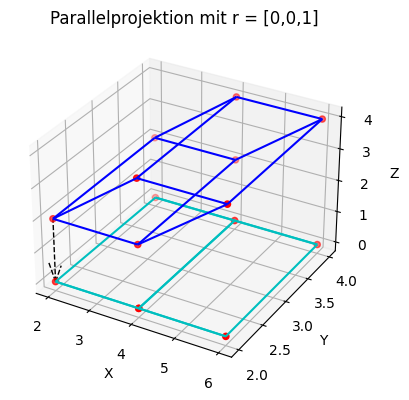

In [7]:
parallelprojektion(Parallelepiped(), np.array([0,0,1]))

### Zentralprojektion
Der Beobachter stet auf dem Projektionszentrum $Z$ und schaut in richtung der xy-Ebene. Der Beobachter sieht nun das blaue Parallelepiped vom Punkt $Z$ so wie die türkise zweidimensionale Form.

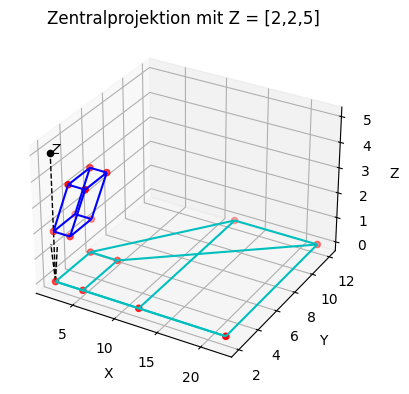

In [9]:
zentralprojektion(Parallelepiped(), np.array([2,2,5]))

## Fazit
An einem Parallelepiped eine Parallel- und Zentralprojektion durchzuführen war eine ansprechende und interessante Aufgabe. Dadurch konnten die Lernziele des Blockes sehr gut vertieft werden.  
Matplotlib ist wie bei der 2D-Visualisierung auch bei der 3D-Visualisierung ein geeignetes Tool, mit welchem einfach und schnell erste Grafiken erzeugt werden können.

## Literaturverzeichnis
[1] Matplotlib. (2020). Matplotlib. Abgerufen am 07.05.2020 von https://matplotlib.org/  
[2] NumPy Developers. (2020). NumPy. Abgerufen am 07.05.2020 von https://numpy.org/  
[3] Konrad Königsberger. (2004) Analysis. Springer-Verlag Berlin Heidelberg.  
[4] G. Teschl, S. Teschl. (2014) Mathematik für Informatiker. Springer-Verlag Berlin Heidelberg.  
[5] Klaus Gerber. (2006). Ruhruniversität Bochum. Abgerufen am 07.05.2020 von http://www.mathe-praxis.de/projektion/promat.pdf  